## GOLD PRICE PREDICTION

###  Import the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn
import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data
import yfinance as yf

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
#Reading the data for the past 13 years.
df = yf.download('GLD','2008-01-01','2021-03-09',auto_adjust=True)


[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-12-31,82.739998,82.830002,81.980003,82.459999,3815600
2008-01-02,83.559998,85.139999,83.440002,84.860001,12291100
2008-01-03,84.870003,85.940002,84.599998,85.570000,9553900
2008-01-04,85.339996,85.550003,84.430000,85.129997,8402200
2008-01-07,85.239998,85.260002,84.570000,84.769997,6944300


In [4]:
#We only need the closing Price .
df = df[['Close']]

In [5]:
#check for missing value
df.isna().sum()

Close    0
dtype: int64

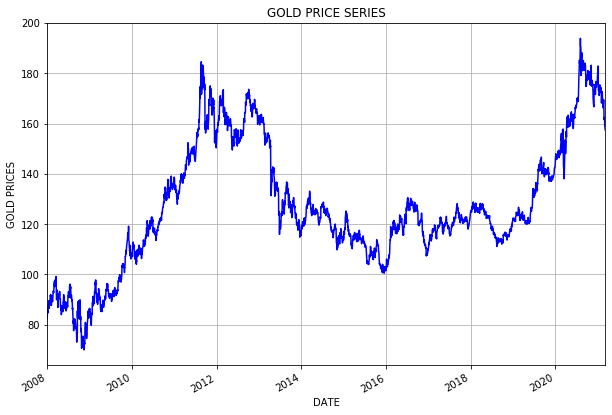

In [6]:
#Plot the closing price of GLD

df['Close'].plot(figsize=(10,7),color='b',grid=True)
plt.xlabel('DATE')
plt.ylabel("GOLD PRICES")
plt.title("GOLD PRICE SERIES")
plt.show()


In [7]:
#Defining the explanatory variables
# Finding moving average of past 3 days and 9 days

df['3_Days'] = df['Close'].shift(1).rolling(window=3).mean()
df['9_Days'] = df['Close'].shift(1).rolling(window=9).mean()



In [8]:
#Checking for null values
df.isna().sum()

Close     0
3_Days    3
9_Days    9
dtype: int64

In [9]:
# dropping the null data

df= df.dropna()

In [10]:
X= df[['3_Days','9_Days']]
X.head()

,3_Days,9_Days
Date,,
2008-01-14,87.793335,85.883333
2008-01-15,88.790001,86.670000
2008-01-16,88.703334,87.017777
2008-01-17,88.076665,87.143333
2008-01-18,87.063332,87.295555


In [11]:
#Defining the target variable

y= df['Close']
y.head()

Date
2008-01-14    89.540001
2008-01-15    87.989998
2008-01-16    86.699997
2008-01-17    86.500000
2008-01-18    87.419998
Name: Close, dtype: float64

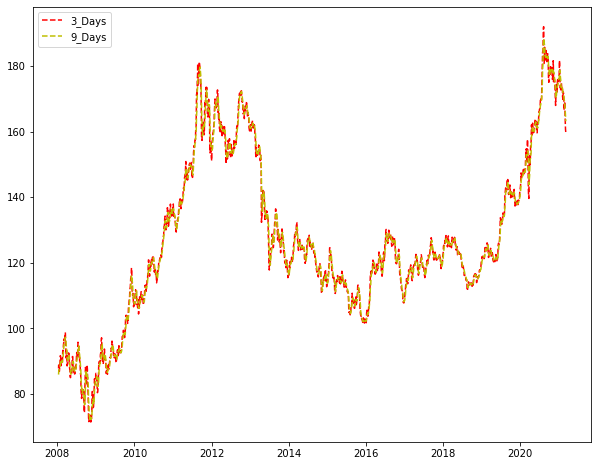

In [12]:
plt.figure(figsize=(10,8))
plt.plot(df['3_Days'],ls='--',color='r',) 
plt.plot( df["9_Days"] , ls='--',color ='y')
plt.legend(['3_Days', '9_Days'])

plt.show()

In [13]:
#Splitting  the data into train and test dataset

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, shuffle=False)

In [14]:
# Creating  a linear regression model

from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X_train, y_train)


print("---------Linear Regression model------------")

print("Gold  Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (c)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

---------Linear Regression model------------
Gold  Price (y) = 1.20 * 3 Days Moving Average (x1) + -0.21 * 9 Days Moving Average (x2) + 0.43 (c)


In [15]:
# Predicting the Gold  prices based on the test dataset 

pre_price = linear.predict(X_test)
pre_price = pd.DataFrame(pre_price, index=y_test.index, columns=['price'])

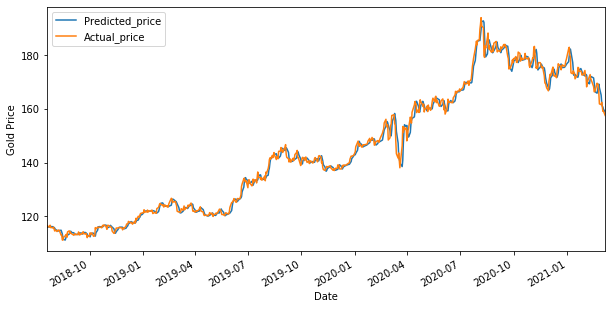

In [16]:
#Visualizing the predicted dataset with the test dataset 

pre_price.plot(figsize=(10, 5),)
y_test.plot()

plt.legend(['Predicted_price', 'Actual_price'])
plt.ylabel("Gold Price")
plt.show()

In [17]:
# Model Evaluation 
#Calculating the r square and mse.

r2_score = linear.score(X_test, y_test)*100

print("R square for regression is ", float("{0:.2f}".format(r2_score)))
np.sqrt(mean_squared_error(y_test,pre_price))

R square for regression is  99.29


1.9589316567332449

The R-squared of the model is 99.29%. Hence the model predicts the Gold Prices well.

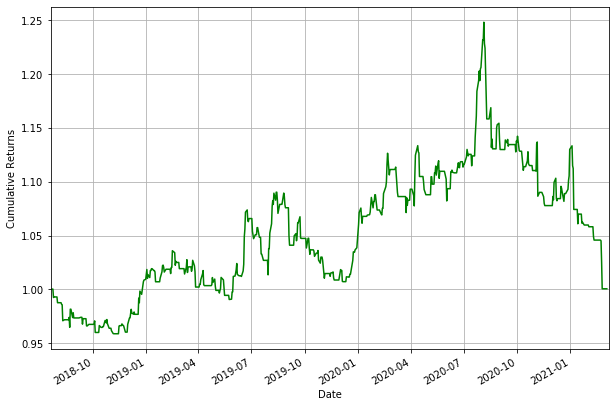

In [18]:
#Plotting the Cummalitve returns to analyse its performance

#comparing predicted price of today with next day for further direction.
gold = pd.DataFrame()
t=int(0.8*len(df)) 
gold['price'] = df[t:]['Close']
gold['predicted_price_next_day'] = pre_price
gold['actual_price_next_day'] = y_test
gold['gold_returns'] = gold['price'].pct_change().shift(-1)


gold['signal'] = np.where(gold.predicted_price_next_day.shift(1) < gold.predicted_price_next_day,1,0)
gold['strategy_returns'] = gold.signal * gold['gold_returns']
((gold['strategy_returns']+1).cumprod()).plot(figsize=(10,7),color='g',grid=True)
plt.ylabel('Cumulative Returns')
plt.show()

In [19]:
#to predict the gold prices and give a position
# whether one should buy GLD or take no position.

df1 = yf.download('GLD', '2008-06-01', '2021-3-09', auto_adjust=True)
df1['3_Day'] = df1['Close'].rolling(window=3).mean()
df1['9_Day'] = df1['Close'].rolling(window=9).mean()
df1 = df1.dropna()

df1['predicted_gold_price'] = linear.predict(df1[['3_Day', '9_Day']])
df1['Position'] = np.where(df1.predicted_gold_price.shift(1) < df1.predicted_gold_price,"Buy","No Position")
df1.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume,3_Day,9_Day,predicted_gold_price,Position
Date,,,,,,,,,
2008-06-12,85.190002,86.070000,84.830002,85.599998,9826200,86.056666,87.017776,85.996777,No Position
2008-06-13,85.330002,86.019997,85.040001,85.830002,8429000,86.149999,86.781110,86.158067,Buy
2008-06-16,88.199997,88.199997,86.970001,87.010002,6993700,86.146667,86.795555,86.151069,No Position
2008-06-17,86.720001,87.519997,86.699997,87.250000,5285800,86.696668,86.862222,86.799187,Buy
2008-06-18,87.660004,88.410004,87.129997,88.279999,7818800,87.513334,87.065555,87.739952,Buy
2008-06-19,89.370003,89.500000,88.389999,88.419998,10520500,87.983332,86.994444,88.320296,Buy
2008-06-20,88.820000,89.610001,88.769997,88.949997,10057800,88.549998,87.101111,88.980194,Buy
2008-06-23,87.010002,87.400002,86.739998,87.089996,12784300,88.153330,87.272221,88.467413,No Position
2008-06-24,87.300003,88.239998,87.239998,87.470001,7398500,87.836665,87.322222,88.075969,No Position


In [21]:
import pickle
Pkl_Filename = "goldpriceprediction.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(linear, file)